
## PART C: [TOTAL 30 MARKS ]
DATASET DESCRIPTION (Source: https://wheeloffortuneanswer.com)
This dataset contains information about various puzzle categories like "Around the House",
"Before and After", "Book Title", and many more.
1. Generate a python script that you can use to scrap the provided website to
access the data. Save your data as a csv file 
2. Generate a visual to depict the “Word To Guess” variable in the above
dataset 

### BREAKDOWN
#### 1. Imports:

requests: This library allows you to send HTTP requests to websites and retrieve their content.
BeautifulSoup: This library helps you parse the HTML content of a webpage and extract specific information.
pandas: This library is used to create and manipulate dataframes, which are convenient for storing and analyzing extracted data.
#### 2. Website URL:

The script defines a variable url that stores the website's address.
#### 3. Sending a Request:

response = requests.get(url): This line sends a GET request to the website and stores the response in the response variable.
#### 4. Checking Response Status:

if response.status_code == 200:: This checks if the request was successful. A status code of 200 indicates that the server responded successfully and sent the requested content.
#### 5. Parsing the Content (if successful):

soup = BeautifulSoup(response.text, 'html.parser'): This line parses the HTML content retrieved from the website using BeautifulSoup. The response.text attribute contains the HTML code of the webpage.
#### 6. Finding the Puzzles Section:

table = soup.find('table'): This line searches for a table element (<table>) within the parsed HTML content. This assumes the website displays puzzles in a table format. However, the actual HTML structure might be different.
#### 7. Looping Through Rows and Columns (if table found):

The code enters this section only if a table is found.
rows = table.find_all('tr'): This line finds all <tr> elements (table rows) within the identified table.
for row in rows:: This loop iterates through each row in the table.
columns = row.find_all('td'): This line finds all <td> elements (table columns) within the current row.
if len(columns) > 1:: This check ensures the row has at least two columns (category and word).
category = columns[0].text.strip(): This line extracts the text content from the first column and removes leading/trailing whitespaces, assuming the category is in the first column.
word_to_guess = columns[1].text.strip(): Similar to above, this extracts the text content from the second column, assuming it contains the word to guess.
puzzles.append({"Category": category, "Word To Guess": word_to_guess}): This line creates a dictionary with the extracted category and word, and adds it to a list named puzzles.
#### 8. Creating a DataFrame and Saving to CSV:

df = pd.DataFrame(puzzles): This line converts the list of dictionaries (puzzles) into a pandas DataFrame.
df.to_csv('wheel_of_fortune_puzzles.csv', index=False): This line saves the DataFrame as a CSV file named "wheel_of_fortune_puzzles.csv". The index=False argument prevents the DataFrame's index from being saved in the CSV file.
#### 9. Error Handling (if request fails):

else:: This block executes if the request to the website fails (status code is not 200).
print("Failed to retrieve the webpage. Status code:", response.status_code): This line prints an error message indicating the failure and the status code received.
Overall, this code effectively scrapes puzzle data from the website, parses the HTML content, extracts relevant information, and saves it in a structured format (CSV) for further analysis or use.

## Generate a python script that you can use to scrap the provided website to access the data. Save your data as a csv file

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the website
url = "https://wheeloffortuneanswer.com"

# Send a GET request to the website
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the page content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the section containing the puzzles (this depends on the website structure)
    # Assuming the puzzles are in a table format
    puzzles = []
    table = soup.find('table')  # Adjust this according to the actual HTML structure
    
    if table:
        rows = table.find_all('tr')
        
        # Loop through each row in the table
        for row in rows:
            columns = row.find_all('td')
            if len(columns) > 1:
                # Extract puzzle category and word to guess
                category = columns[0].text.strip()
                word_to_guess = columns[1].text.strip()
                
                puzzles.append({"Category": category, "Word To Guess": word_to_guess})
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(puzzles)
    
    # Save the DataFrame to a CSV file
    df.to_csv('wheel_of_fortune_puzzles.csv', index=False)
    print("Data has been saved to 'wheel_of_fortune_puzzles.csv'")
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


Data has been saved to 'wheel_of_fortune_puzzles.csv'


### SUMMARY
The code above is a Python script that scrapes puzzle information from the website "https://wheeloffortuneanswer.com" and saves it to a CSV file named "wheel_of_fortune_puzzles.csv". 

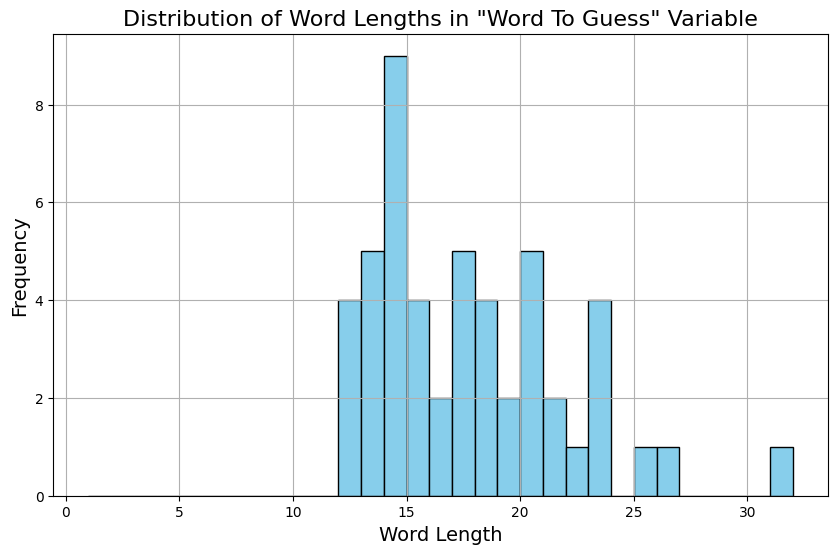

In [2]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('wheel_of_fortune_puzzles.csv')

# Calculate the length of each word to guess
df['Word Length'] = df['Word To Guess'].apply(lambda x: len(x))

# Plot the distribution of word lengths
plt.figure(figsize=(10, 6))
df['Word Length'].plot(kind='hist', bins=range(1, max(df['Word Length'])+2), edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Distribution of Word Lengths in "Word To Guess" Variable', fontsize=16)
plt.xlabel('Word Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show plot
plt.grid(True)
plt.show()


### Key Elements of the Visualization:

#### X-axis: Represents the word length (number of characters)
#### Y-axis: Represents the frequency (count) of words with a particular length
#### Bars: The height of each bar corresponds to the number of words in the dataset having that specific length.
### Observations from the Histogram:
#### The most frequent word lengths appear to be in the range of 15 characters.
#### There are fewer words with shorter lengths and longer lengths
#### The overall distribution appears to be somewhat symmetrical, suggesting that there's no strong bias towards very short or very long words in the dataset.

VIEWING THE RECORDS IN THE DATAFRAME

In [3]:
df

,Category,Word To Guess,Word Length
0,Around the House,Around the House Filter,23
1,Before and After,Before and After Filter,23
2,Book Title (Best Seller),Book Title (Best Seller) Filter,31
3,Classic Movie,Classic Movie Filter,20
4,Classic TV,Classic TV Filter,17
5,College Life,Not Available.,14
6,Event,Event Filter,12
7,Family,Family Filter,13
8,Fictional Character,Fictional Character Filter,26
9,Fictional Place,Fictional Place Filter,22
